Import library

In [2]:
import numpy as np
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import matplotlib as mpl

Import data Set

In [3]:
# the  bank-additional-full dataset
opened_file = open('bank-additional/bank-additional/bank-additional-full.csv')
read_file = reader(opened_file, delimiter=";")
bankAddFull= list(read_file) # bank-additional-full
bankAddFull_header =bankAddFull[0]
bankAddFull= bankAddFull[1:]

In [4]:
# the  bank-additional dataset
opened_file = open('bank-additional/bank-additional/bank-additional.csv')
read_file = reader(opened_file, delimiter=";")
bankAdd= list(read_file) # bank-additional-full
bankAdd_header =bankAdd[0]
bankAdd= bankAdd[1:]

In [5]:
### The bank-full dataset
opened_file = open('bank/bank-full.csv')
read_file = reader(opened_file, delimiter=";")
bankFull= list(read_file)
bankFull_header = bankFull[0]
bankFull= bankFull[1:]

In [6]:
### The bank dataset
opened_file = open('bank/bank.csv')
read_file = reader(opened_file, delimiter=";")
bank= list(read_file)
bank_header = bank[0]
bank= bank[1:]

 EXplore dataaset with a specific function

In [7]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Some data from bank additionnal full

In [8]:
#print some data from bank additionnal full
print(bankAddFull_header )
print('\n')
explore_data(bankAddFull,0,2, True)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


['56', 'housemaid', 'married', 'basic.4y', 'no', 'no', 'no', 'telephone', 'may', 'mon', '261', '1', '999', '0', 'nonexistent', '1.1', '93.994', '-36.4', '4.857', '5191', 'no']


['57', 'services', 'married', 'high.school', 'unknown', 'no', 'no', 'telephone', 'may', 'mon', '149', '1', '999', '0', 'nonexistent', '1.1', '93.994', '-36.4', '4.857', '5191', 'no']


Number of rows: 41188
Number of columns: 21


In [9]:
bankAddFull_df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep = ';')
bankAddFull_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Some data from bank additionnal 

In [10]:
#print some data from bank additionnal 
print(bankAdd_header )
print('\n')
explore_data(bankAdd,0,2, True)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


['30', 'blue-collar', 'married', 'basic.9y', 'no', 'yes', 'no', 'cellular', 'may', 'fri', '487', '2', '999', '0', 'nonexistent', '-1.8', '92.893', '-46.2', '1.313', '5099.1', 'no']


['39', 'services', 'single', 'high.school', 'no', 'no', 'no', 'telephone', 'may', 'fri', '346', '4', '999', '0', 'nonexistent', '1.1', '93.994', '-36.4', '4.855', '5191', 'no']


Number of rows: 4119
Number of columns: 21


 some data from bankfull

In [11]:
#print some data from bankfull
print(bankFull_header )
print('\n')
explore_data(bankFull,0,2, True)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


['58', 'management', 'married', 'tertiary', 'no', '2143', 'yes', 'no', 'unknown', '5', 'may', '261', '1', '-1', '0', 'unknown', 'no']


['44', 'technician', 'single', 'secondary', 'no', '29', 'yes', 'no', 'unknown', '5', 'may', '151', '1', '-1', '0', 'unknown', 'no']


Number of rows: 45211
Number of columns: 17


Some data from bank

In [12]:
#print some data from bank dataset
print(bank_header )
print('\n')
explore_data(bank,0,2, True)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


['30', 'unemployed', 'married', 'primary', 'no', '1787', 'no', 'no', 'cellular', '19', 'oct', '79', '1', '-1', '0', 'unknown', 'no']


['33', 'services', 'married', 'secondary', 'no', '4789', 'yes', 'yes', 'cellular', '11', 'may', '220', '1', '339', '4', 'failure', 'no']


Number of rows: 4521
Number of columns: 17


Explore data set with pandas

In [13]:
bankAddFull_df = pd.read_csv('bank-additional/bank-additional/bank-additional-full.csv', sep = ';')

In [14]:
bankAddFull_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
bankAddFull_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
#Checking for null value
bankAddFull_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
#import seaborn as sns
#plt.figure(figsize=(20,16))
#sns.heatmap(bankAddFull_df.corr(),annot=True)
#plt.show()

## Data transformation 
The objectif is to transform categorical variables to its encoded value (numerical) . <br>
We will focus our analysis on bank additionnal full

#### Encode data :  There are some categorical data in  the dataset, so we need to encode them

In [18]:
#Encode the categorical data
for col in bankAddFull_df.columns:
    if bankAddFull_df[col].dtype==object:
           bankAddFull_df[col]=bankAddFull_df[col].astype('category')
           bankAddFull_df[col]=bankAddFull_df[col].cat.codes

In [19]:
# Visualisation 
bankAddFull_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


Extract training data and target data 

In [20]:
train = bankAddFull_df.iloc[:,0:20] # train data
target = bankAddFull_df['y'] # the result

In [21]:
bankAddFull_df.shape

(41188, 21)

In [22]:
#bankAddFull_df.iloc[:,0:2]

In [23]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


In [24]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int8

First train 
### KNN Classification
KNN can be used for both classification and regression predictive problems.
k- Nearest Neighbor is also called a lazy learner
because it is an instance based learning type. In this kind of
learning, whatever they perform is simply approximated
regionally and every computation is postponed till
classification. The k-NN algorithm rule is among the best
of all machine learning algorithms.
The k-nearest neighbor algorithmic rule makes a
classification for a given sample while not creating any
assumptions regarding the distribution of the training and
testing of datasets. Every testing sample should be
compared to all the existing samples within the training
model set so as to classify the sample. So whenever there is
a choice to be made for utilizing this algorithm, first of all,
the distances between the testing dataset and everyone in
the samples within the training model set should be
calculated. During this proposal, the Euclidean distance is
calculated which is a default distance measurement
technique, but in general, any distance measurement
technique may be used as per choice. The Euclidean
distance metric needs standardization of all options into
identical range. At this time, the k nearest neighbor of the
given sample are determined wherever k represents
associate whole number is 1 between one and therefore the
total number of samples. The k-nearest neighbor classifier
could be a statistic classifier that's aforementioned to yield
associate economic performance for optimum values of k

In [26]:
#Training the Model

#Now that we have performed feature extraction from our data, it is time to build our model. We will start by splitting our data into training and test sets:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=0)  


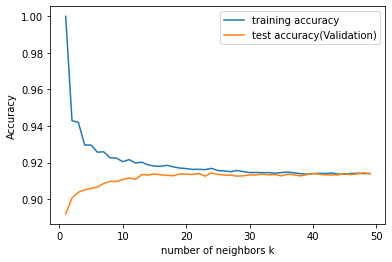

In [27]:
# Create training and testing datasets

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_list = range(1, 50)

for k in neighbors_list:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=k)
    # fitting the model with the data
    knn.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_list,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_list,
        test_accuracy, label="test accuracy(Validation)")
plt.ylabel("Accuracy")
plt.xlabel("number of neighbors k")
plt.legend()

In [28]:
print("Acc(test) score: ",test_accuracy, "\n")
print("Training score : ",training_accuracy)

Acc(test) score:  [0.8918831431577243, 0.900623128591082, 0.903698308650967, 0.9050740470988103, 0.9058023792182569, 0.9066116371287529, 0.9084729303228939, 0.909686817188638, 0.9096058913975884, 0.9106579266812334, 0.9116290361738286, 0.9108197782633325, 0.9133284777858703, 0.9131666262037711, 0.9137331067411184, 0.9132475519948208, 0.9129238488306223, 0.9127619972485231, 0.9137331067411184, 0.9136521809500688, 0.9134094035769199, 0.9140568099053168, 0.9125192198753743, 0.9142995872784656, 0.9134903293679696, 0.9131666262037711, 0.9130857004127215, 0.9126001456664239, 0.9126810714574735, 0.9132475519948208, 0.9131666262037711, 0.9136521809500688, 0.9132475519948208, 0.9134094035769199, 0.9126810714574735, 0.9136521809500688, 0.9132475519948208, 0.9126810714574735, 0.9133284777858703, 0.9139758841142672, 0.9136521809500688, 0.9132475519948208, 0.9131666262037711, 0.9132475519948208, 0.9138949583232177, 0.9134094035769199, 0.913814032532168, 0.9142995872784656, 0.9139758841142672] 

Tra

Best score for KNN: 

In [29]:
max(test_accuracy)


0.9142995872784656

In [58]:
#[i for i in range(len(test_accuracy)) if int(test_accuracy [i])== int(training_accuracy[i])]

### Random Forest Classification

#### What 's Random Forest
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

Random forests has a variety of applications, such as recommendation engines, image classification and feature selection. It can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases. <br>
## How random forests work 
To understand and use the various options, further information about how they are computed is useful. Most of the options depend on two data objects generated by random forests.

When the training set for the current tree is drawn by sampling with replacement, about one-third of the cases are left out of the sample. This oob (out-of-bag) data is used to get a running unbiased estimate of the classification error as trees are added to the forest. It is also used to get estimates of variable importance.

After each tree is built, all of the data are run down the tree, and proximities are computed for each pair of cases. If two cases occupy the same terminal node, their proximity is increased by one. At the end of the run, the proximities are normalized by dividing by the number of trees. Proximities are used in replacing missing data, locating outliers, and producing illuminating low-dimensional views of the data. <br>
### The out-of-bag (oob) error estimate 
In random forests, there is no need for cross-validation or a separate test set to get an unbiased estimate of the test set error. It is estimated internally, during the run, as follows:

Each tree is constructed using a different bootstrap sample from the original data. About one-third of the cases are left out of the bootstrap sample and not used in the construction of the kth tree.

Put each case left out in the construction of the kth tree down the kth tree to get a classification. In this way, a test set classification is obtained for each case in about one-third of the trees. At the end of the run, take j to be the class that got most of the votes every time case n was oob. The proportion of times that j is not equal to the true class of n averaged over all cases is the oob error estimate. This has proven to be unbiased in many tests.<br>
### How does the algorithm work?
It works in four steps:

1.Select random samples from a given dataset.

2.Construct a decision tree for each sample and get a prediction result from each decision tree.

3.Perform a vote for each predicted result.

4.Select the prediction result with the most votes as the final prediction.

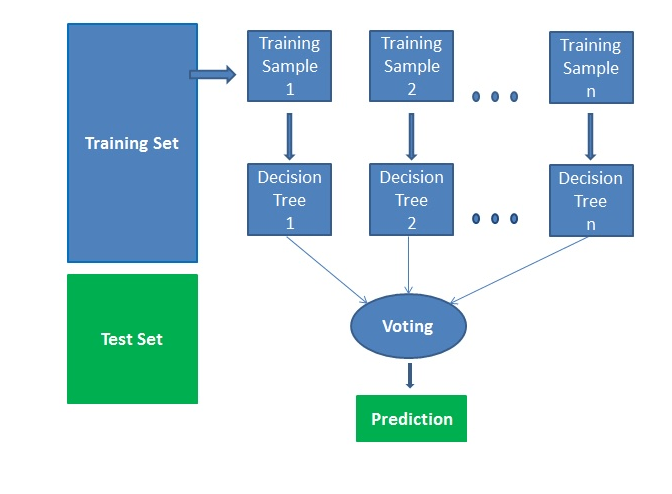

In [102]:
from IPython.display import Image
Image('rf.png')



#### When do we used random forest?

Random Forest is intrinsically suited for multiclass problems, while SVM is intrinsically two-class. 

Random Forest works well with a mixture of numerical and categorical features. When features are on the various scales, it is also fine. Roughly speaking, with Random Forest you can use data as they are.

#### Advantage of Random Forest
Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.

It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

Whether you have a regression or classification task, random forest is an applicable model for your needs. It can handle binary features, categorical features, and numerical features. There is very little pre-processing that needs to be done. The data does not need to be rescaled or transformed.

Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.

You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.


In [59]:
from pylab import plot, show
%matplotlib inline

In [30]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = train
Y = target
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
rf = RandomForestClassifier(random_state = 42)  # random_state is the seed used by the random number generator
#fitting the model
model = rf.fit(X_train, y_train)

In [61]:
#Getting the score of feature matrix and its target values 
model.score(X_test,y_test)

0.90811447068344

### Logistic regression 
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value. it is a predictive analysis algorithm and based on the concept of probability. <br>

#### Advantages
Because of its efficient and straightforward nature, doesn’t require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn’t require scaling of features. Logistic regression provides a probability score for observations.
#### Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can’t solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=0)  

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9096058913975884


/home/glorie/.virtualenvs/spatialspace/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Compare Algorithms

In [33]:
 #Compare Algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# split data into X and y
X = bankAddFull_df.iloc[:,0:20]
Y = bankAddFull_df['y']
# prepare models
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' RF ' , RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/glorie/.virtualenvs/spatialspace/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/home/glorie/.virtualenvs/spatialspace/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/glorie/.virtualenvs/spatialspace/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (sta

 LR : 0.900230 (0.098686)
 KNN : 0.898264 (0.089778)


/home/glorie/.virtualenvs/spatialspace/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 RF : 0.900109 (0.095737)


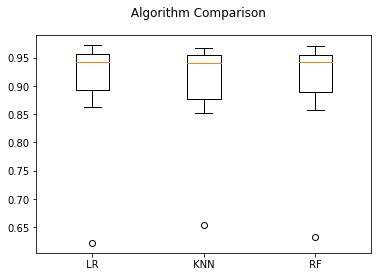

In [34]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle( ' Algorithm Comparison ' )
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()